In [4]:
from skimage import io
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import os
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.core.pylabtools import figsize
# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from fig_code.figures import *
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
import warnings
warnings.filterwarnings('ignore')


# use seaborn plotting defaults
import seaborn as sns; sns.set()




In [5]:
# Reading Apple images from a folder
folder1 = ("/Users/amad/Desktop/495/Image/Apple")

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder1)
          for filename in files
          if filename.lower().endswith('.jpg')]

apple = []
for img in images:
    apple.append(io.imread(img).flatten())
    

In [6]:
apple

[array([37, 37, 37, ..., 10, 10, 10], dtype=uint8),
 array([27, 27, 27, ..., 55, 55, 55], dtype=uint8),
 array([  7,   7,   7, ..., 111, 111, 111], dtype=uint8),
 array([ 25,  25,  25, ..., 127, 127, 127], dtype=uint8),
 array([52, 52, 52, ..., 68, 68, 68], dtype=uint8),
 array([32, 32, 32, ..., 50, 50, 50], dtype=uint8),
 array([37, 37, 37, ..., 61, 61, 61], dtype=uint8),
 array([ 28,  28,  28, ..., 103, 103, 103], dtype=uint8),
 array([39, 39, 39, ..., 50, 50, 50], dtype=uint8),
 array([51, 51, 51, ..., 82, 82, 82], dtype=uint8),
 array([58, 58, 58, ..., 31, 31, 31], dtype=uint8),
 array([44, 44, 44, ..., 80, 80, 80], dtype=uint8),
 array([39, 39, 39, ...,  7,  7,  7], dtype=uint8),
 array([10, 10, 10, ..., 93, 93, 93], dtype=uint8),
 array([24, 24, 24, ...,  7,  7,  7], dtype=uint8),
 array([49, 49, 49, ..., 57, 57, 57], dtype=uint8),
 array([29, 29, 29, ..., 39, 39, 39], dtype=uint8),
 array([18, 18, 18, ..., 34, 34, 34], dtype=uint8),
 array([30, 30, 30, ..., 63, 63, 63], dtype=ui

In [7]:
# Reading banana images
folder2 = ("/Users/amad/Desktop/495/Image/Banana")

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder2)
          for filename in files
          if filename.lower().endswith('.jpg')]

banana = []
for img in images:
    banana.append(io.imread(img).flatten())
    

In [8]:
np.shape(banana)

(50, 230400)

In [9]:
# Reading orange images
folder3 = ("/Users/amad/Desktop/495/Image/Orange")

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder3)
          for filename in files
          if filename.lower().endswith('.jpg')]

orange = []
for img in images:
    orange.append(io.imread(img).flatten())
    

In [10]:
# Creating dataframe for Apple images
apple_df = pd.DataFrame(apple)
labels=[]
apple_df

,0,1,2,3,4,5,6,7,8,9,...,230390,230391,230392,230393,230394,230395,230396,230397,230398,230399
0,37,37,37,37,37,37,37,37,37,38,...,12,11,11,11,10,10,10,10,10,10
1,27,27,27,27,27,27,27,27,27,28,...,57,56,56,56,55,55,55,55,55,55
2,7,7,7,7,7,7,7,7,7,7,...,115,114,114,114,113,113,113,111,111,111
3,25,25,25,24,24,24,23,23,23,22,...,143,138,138,138,131,131,131,127,127,127
4,52,52,52,52,52,52,54,54,54,56,...,76,73,73,73,70,70,70,68,68,68
5,32,32,32,32,32,32,32,32,32,31,...,57,49,49,49,47,47,47,50,50,50
6,37,37,37,37,37,37,38,38,38,38,...,65,63,63,63,62,62,62,61,61,61
7,28,28,28,28,28,28,29,29,29,30,...,69,91,91,91,103,103,103,103,103,103
8,39,39,39,39,39,39,39,39,39,40,...,60,57,57,57,53,53,53,50,50,50
9,51,51,51,50,50,50,49,49,49,49,...,87,86,86,86,84,84,84,82,82,82


In [11]:
len(apple)

50

In [12]:
# Creating labels for apple images dataframe (0)
for i in range(len(apple)):
    labels.append(0)

In [13]:
apple_df['labels']=labels
apple_df.shape

(50, 230401)

In [14]:
apple_df

,0,1,2,3,4,5,6,7,8,9,...,230391,230392,230393,230394,230395,230396,230397,230398,230399,labels
0,37,37,37,37,37,37,37,37,37,38,...,11,11,11,10,10,10,10,10,10,0
1,27,27,27,27,27,27,27,27,27,28,...,56,56,56,55,55,55,55,55,55,0
2,7,7,7,7,7,7,7,7,7,7,...,114,114,114,113,113,113,111,111,111,0
3,25,25,25,24,24,24,23,23,23,22,...,138,138,138,131,131,131,127,127,127,0
4,52,52,52,52,52,52,54,54,54,56,...,73,73,73,70,70,70,68,68,68,0
5,32,32,32,32,32,32,32,32,32,31,...,49,49,49,47,47,47,50,50,50,0
6,37,37,37,37,37,37,38,38,38,38,...,63,63,63,62,62,62,61,61,61,0
7,28,28,28,28,28,28,29,29,29,30,...,91,91,91,103,103,103,103,103,103,0
8,39,39,39,39,39,39,39,39,39,40,...,57,57,57,53,53,53,50,50,50,0
9,51,51,51,50,50,50,49,49,49,49,...,86,86,86,84,84,84,82,82,82,0


In [15]:
# Creating dataframe for banana images
banana_df = pd.DataFrame(banana)
blabels=[]
banana_df

,0,1,2,3,4,5,6,7,8,9,...,230390,230391,230392,230393,230394,230395,230396,230397,230398,230399
0,16,16,16,16,16,16,16,16,16,17,...,28,27,27,27,27,27,27,27,27,27
1,19,19,19,19,19,19,19,19,19,20,...,30,29,29,29,27,27,27,26,26,26
2,36,36,36,36,36,36,37,37,37,37,...,34,32,32,32,29,29,29,27,27,27
3,39,39,39,38,38,38,37,37,37,37,...,29,30,30,30,31,31,31,31,31,31
4,23,23,23,23,23,23,24,24,24,24,...,51,51,51,51,49,49,49,47,47,47
5,15,15,15,15,15,15,15,15,15,16,...,31,31,31,31,31,31,31,31,31,31
6,18,18,18,18,18,18,18,18,18,17,...,12,13,13,13,13,13,13,13,13,13
7,22,22,22,22,22,22,22,22,22,23,...,45,44,44,44,43,43,43,43,43,43
8,19,19,19,19,19,19,19,19,19,19,...,35,34,34,34,34,34,34,34,34,34
9,17,17,17,18,18,18,20,20,20,22,...,42,40,40,40,41,41,41,42,42,42


In [16]:
len(banana)

50

In [17]:
# Creating labels for baanana (1)
for i in range(len(banana)):
    blabels.append(1)

In [18]:
banana_df['labels']=blabels
banana_df.shape

(50, 230401)

In [19]:
banana_df

,0,1,2,3,4,5,6,7,8,9,...,230391,230392,230393,230394,230395,230396,230397,230398,230399,labels
0,16,16,16,16,16,16,16,16,16,17,...,27,27,27,27,27,27,27,27,27,1
1,19,19,19,19,19,19,19,19,19,20,...,29,29,29,27,27,27,26,26,26,1
2,36,36,36,36,36,36,37,37,37,37,...,32,32,32,29,29,29,27,27,27,1
3,39,39,39,38,38,38,37,37,37,37,...,30,30,30,31,31,31,31,31,31,1
4,23,23,23,23,23,23,24,24,24,24,...,51,51,51,49,49,49,47,47,47,1
5,15,15,15,15,15,15,15,15,15,16,...,31,31,31,31,31,31,31,31,31,1
6,18,18,18,18,18,18,18,18,18,17,...,13,13,13,13,13,13,13,13,13,1
7,22,22,22,22,22,22,22,22,22,23,...,44,44,44,43,43,43,43,43,43,1
8,19,19,19,19,19,19,19,19,19,19,...,34,34,34,34,34,34,34,34,34,1
9,17,17,17,18,18,18,20,20,20,22,...,40,40,40,41,41,41,42,42,42,1


In [20]:
# Creating dataframe for orange images
orange_df = pd.DataFrame(orange)
olabels=[]
orange_df

,0,1,2,3,4,5,6,7,8,9,...,230390,230391,230392,230393,230394,230395,230396,230397,230398,230399
0,32,32,32,32,32,32,33,33,33,34,...,67,67,67,67,67,67,67,68,68,68
1,21,21,21,21,21,21,21,21,21,22,...,58,57,57,57,57,57,57,57,57,57
2,20,20,20,21,21,21,21,21,21,22,...,57,55,55,55,53,53,53,52,52,52
3,32,32,32,32,32,32,32,32,32,31,...,14,14,14,14,12,12,12,10,10,10
4,21,21,21,21,21,21,21,21,21,22,...,10,10,10,10,10,10,10,10,10,10
5,33,33,33,35,35,35,36,36,36,38,...,11,13,13,13,15,15,15,17,17,17
6,44,44,44,44,44,44,45,45,45,46,...,81,80,80,80,79,79,79,79,79,79
7,22,22,22,22,22,22,22,22,22,23,...,9,10,10,10,11,11,11,12,12,12
8,23,23,23,23,23,23,23,23,23,23,...,64,63,63,63,62,62,62,60,60,60
9,21,21,21,21,21,21,21,21,21,22,...,12,11,11,11,11,11,11,11,11,11


In [21]:
# Creating labels for orange images (2)
for i in range(len(orange)):
    olabels.append(2)

In [22]:
orange_df['labels']=olabels
orange_df.shape

(50, 230401)

In [23]:
orange_df

,0,1,2,3,4,5,6,7,8,9,...,230391,230392,230393,230394,230395,230396,230397,230398,230399,labels
0,32,32,32,32,32,32,33,33,33,34,...,67,67,67,67,67,67,68,68,68,2
1,21,21,21,21,21,21,21,21,21,22,...,57,57,57,57,57,57,57,57,57,2
2,20,20,20,21,21,21,21,21,21,22,...,55,55,55,53,53,53,52,52,52,2
3,32,32,32,32,32,32,32,32,32,31,...,14,14,14,12,12,12,10,10,10,2
4,21,21,21,21,21,21,21,21,21,22,...,10,10,10,10,10,10,10,10,10,2
5,33,33,33,35,35,35,36,36,36,38,...,13,13,13,15,15,15,17,17,17,2
6,44,44,44,44,44,44,45,45,45,46,...,80,80,80,79,79,79,79,79,79,2
7,22,22,22,22,22,22,22,22,22,23,...,10,10,10,11,11,11,12,12,12,2
8,23,23,23,23,23,23,23,23,23,23,...,63,63,63,62,62,62,60,60,60,2
9,21,21,21,21,21,21,21,21,21,22,...,11,11,11,11,11,11,11,11,11,2


In [24]:
# merging all dataframes
frames = [apple_df, banana_df, orange_df]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

In [51]:
# Remove repeted columns in a DataFrame
Own_img = rndmged.loc[:,~mged.T.duplicated(keep='first')]
print(Own_img)

      0   3   6   9  12  15  18  21  24  27  ...  230373  230376  230379  \
0    10  10  10  10  10  10  10  10  12  12  ...     101     101     101   
1     7   7   7   7   7   7   7   7  11  11  ...      90      84      84   
2    22  22  22  23  23  24  24  24  23  23  ...      51      47      47   
3    16  16  16  17  17  18  18  18  18  18  ...      40      40      39   
4    42  39  36  33  32  32  32  33  36  39  ...      96      93      92   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...     ...     ...     ...   
145  24  24  25  26  26  27  28  28  25  27  ...       9       9       9   
146   8   8   8   8   8   8   8   8   9   9  ...      76      73      72   
147  19  19  19  20  20  21  21  21  25  24  ...      53      52      52   
148  37  36  35  33  33  34  35  36  42  46  ...     105     101     101   
149  16  16  16  17  17  18  18  18  20  20  ...      49      48      48   

     230382  230385  230388  230391  230394  230397  labels  
0       101     100      

In [26]:
# Droping labels and assigning to X dataframe
X = Own_img.drop(['labels'], axis=1)
# Assigning labels to y
y = Own_img['labels']


In [27]:
X

,0,3,6,9,12,15,18,21,24,27,...,230370,230373,230376,230379,230382,230385,230388,230391,230394,230397
0,10,10,10,10,10,10,10,10,12,12,...,103,101,101,101,101,100,98,96,94,93
1,7,7,7,7,7,7,7,7,11,11,...,91,90,84,84,83,82,81,81,82,82
2,22,22,22,23,23,24,24,24,23,23,...,51,51,47,47,46,45,45,44,43,43
3,16,16,16,17,17,18,18,18,18,18,...,40,40,40,39,38,37,36,35,36,36
4,42,39,36,33,32,32,32,33,36,39,...,96,96,93,92,91,90,89,88,88,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,24,24,25,26,26,27,28,28,25,27,...,9,9,9,9,9,8,8,7,7,7
146,8,8,8,8,8,8,8,8,9,9,...,78,76,73,72,72,71,71,70,70,69
147,19,19,19,20,20,21,21,21,25,24,...,51,53,52,52,51,50,48,47,46,46
148,37,36,35,33,33,34,35,36,42,46,...,105,105,101,101,101,101,101,98,93,89


In [28]:
y

0      0
1      0
2      1
3      1
4      2
      ..
145    0
146    0
147    1
148    0
149    1
Name: labels, Length: 150, dtype: int64

In [29]:
# Splitting the dataset into test and training datasets (80:20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 76800)
(120,)
(30, 76800)
(30,)


# Fitting Logistic Regression

In [30]:
# Fitting model and predicting test dataset

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))

0.7


In [31]:
# Probability of prediction
clf.predict_proba(X_test)

array([[2.05912667e-12, 1.86703768e-33, 1.00000000e+00],
       [9.92206063e-18, 1.91825785e-36, 1.00000000e+00],
       [8.43059458e-03, 9.91024822e-01, 5.44583785e-04],
       [2.85629784e-09, 1.40983284e-32, 9.99999997e-01],
       [9.99816933e-01, 2.90254655e-07, 1.82776323e-04],
       [1.12360915e-19, 1.00000000e+00, 3.23769876e-13],
       [1.00000000e+00, 7.68412669e-19, 1.63828874e-17],
       [5.64833017e-10, 9.99999999e-01, 1.63549186e-13],
       [7.78032045e-27, 1.00000000e+00, 2.64194466e-21],
       [9.99761483e-01, 1.68840988e-20, 2.38516598e-04],
       [9.99983530e-01, 1.10016881e-07, 1.63595138e-05],
       [5.24738147e-08, 5.03956952e-36, 9.99999948e-01],
       [4.47239315e-19, 1.00000000e+00, 1.14637475e-15],
       [9.99493938e-01, 1.81106595e-09, 5.06060524e-04],
       [7.13224397e-13, 4.63737762e-12, 1.00000000e+00],
       [5.65460531e-04, 3.20786364e-13, 9.99434539e-01],
       [5.62125401e-15, 9.99989825e-01, 1.01746762e-05],
       [8.71577250e-01, 2.06828

In [32]:
# Score of probability
clf.score(X_test, y_test)

0.7

In [33]:
# Precision, Recall and F-1 score  for Logistic Reg

print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.60      1.00      0.75         6
           2       0.82      0.64      0.72        14

    accuracy                           0.70        30
   macro avg       0.69      0.75      0.70        30
weighted avg       0.72      0.70      0.70        30



In [34]:
# Confusion Matrix for Logistic Regression for Logistic Reg
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[6 2 2]
 [0 6 0]
 [3 2 9]]


# Decision Tree

In [35]:
# Fitting model and predicting test dataset
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

In [36]:
# Probability of prediction and score of probability
clf.predict_proba(X_test)
clf.score(X_test, y_test)


0.5666666666666667

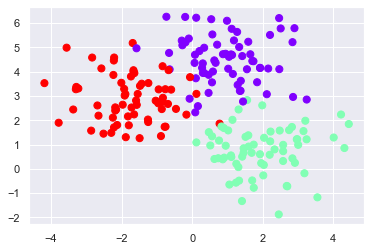

In [37]:
# Plotting some features of the data
X, y = make_blobs(n_samples= 200, centers=3,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [38]:
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))


Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.62      0.83      0.71         6
           2       0.58      0.50      0.54        14

    accuracy                           0.57        30
   macro avg       0.57      0.61      0.58        30
weighted avg       0.56      0.57      0.56        30



[Text(399.47727272727275, 489.24, 'X[46841] <= 107.5\ngini = 0.664\nsamples = 120\nvalue = [40, 44, 36]'),
 Text(209.25, 380.52000000000004, 'X[53495] <= 134.5\ngini = 0.514\nsamples = 64\nvalue = [33, 1, 30]'),
 Text(114.13636363636364, 271.8, 'X[72831] <= 241.5\ngini = 0.313\nsamples = 27\nvalue = [22, 1, 4]'),
 Text(76.0909090909091, 163.08000000000004, 'X[24750] <= 179.0\ngini = 0.083\nsamples = 23\nvalue = [22, 1, 0]'),
 Text(38.04545454545455, 54.360000000000014, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0]'),
 Text(114.13636363636364, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(152.1818181818182, 163.08000000000004, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(304.3636363636364, 271.8, 'X[42061] <= 66.5\ngini = 0.418\nsamples = 37\nvalue = [11, 0, 26]'),
 Text(228.27272727272728, 163.08000000000004, 'X[29811] <= 98.0\ngini = 0.18\nsamples = 10\nvalue = [9, 0, 1]'),
 Text(190.22727272727275, 54.360000000000014, 'gini = 0.0\nsamples = 9\nvalue

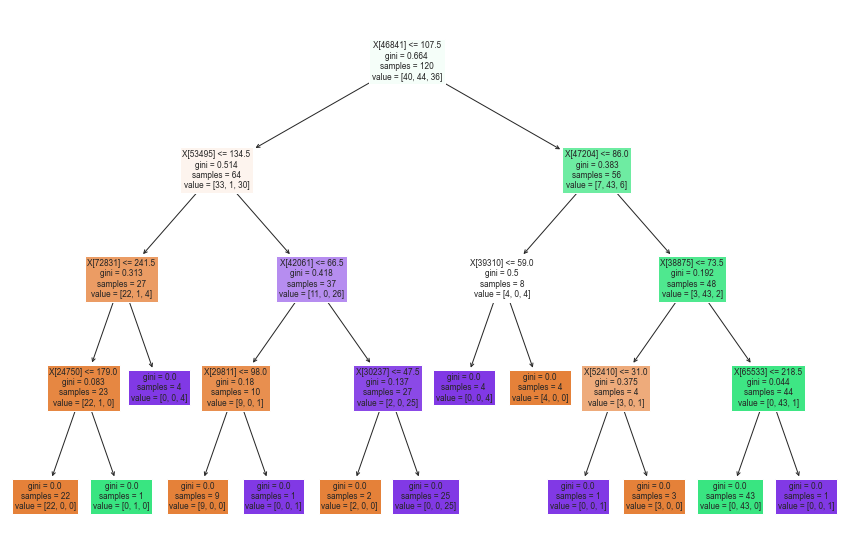

In [39]:
# Plotting tree
plt.figure(figsize = (15,10))
tree.plot_tree(clf, filled = True)

In [40]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[5 0 5]
 [1 5 0]
 [4 3 7]]


<Figure size 432x288 with 0 Axes>

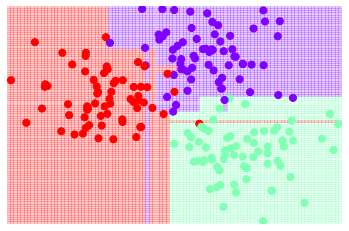

<Figure size 432x288 with 0 Axes>

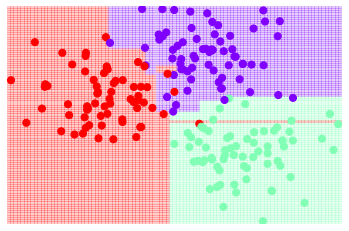

In [41]:
# Plotting tree
plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

In [42]:
plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', options=(1, 5), value=1), Output()), _dom_classes=('widget…

In [43]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=300, centers=3,
                      random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                   xlim=(X[:, 0].min(), X[:, 0].max()),
                   ylim=(X[:, 1].min(), X[:, 1].max()))
    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0, 100]);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

# Random Forest


In [44]:
# FItting the model and predicting test dataset
clf = RandomForestClassifier(n_estimators=100, random_state=50)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [45]:
# Probability of prediction
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.8333333333333334

In [46]:
# Precision , Recall and F1 Score
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.86      1.00      0.92         6
           2       0.86      0.86      0.86        14

    accuracy                           0.83        30
   macro avg       0.83      0.85      0.84        30
weighted avg       0.83      0.83      0.83        30



In [47]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[ 7  1  2]
 [ 0  6  0]
 [ 2  0 12]]


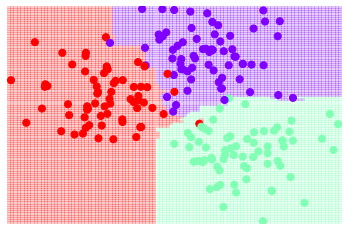

In [48]:
# Plotting trees
visualize_tree(clf, X, y, boundaries=False);

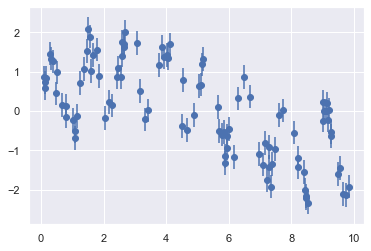

In [49]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


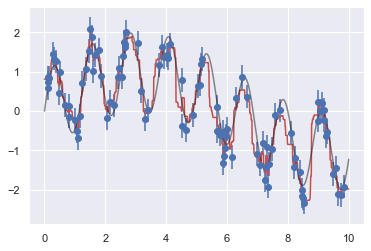

In [50]:
xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### Logistic Regression
logistic regression is underfitting to the data so it is high biased
It is not classifying the data correctly as shown in the graph

### Decision Tree
Decision tree is overfitting to the data and so it has a high variance.
It is not classifying the data correctly as shown on the graphs. 

### Random Forest
Random forest is best fit to the data so it is low bias and low variance.As seen in the figure it is best fit to the data as compared to logistic regression and decision tree. Also its accuracy is higher than the other two models above